# Navier's Solution of Simply-Supported Plates

In [1]:
import numpy as np

size = Lx, Ly = (600., 800.)
E = 2890.
nu = 0.2
t = 25.0

In [2]:
G = E/2/(1+nu)
D = np.array([[1, nu, 0], [nu, 1, 0], [0., 0, (1-nu)/2]]) * t**3 * (E / (1-nu**2)) / 12
S = np.array([[G, 0], [0, G]]) * t * 5 / 6

In [3]:
loads = {
        'LG1' : {
            'LC1' : {
                'type' : 'rect',
                'points' : [[0, 0], [Lx, Ly]],
                'value' : [0, 0, -0.01],
                    },
            'LC2' : {
                'type' : 'rect',
                'region' : [0.2*Lx, 0.5*Ly, 0.2*Lx, 0.3*Ly],
                'value' : [0, 0, -100],
                    }
                },
        'LG2' : {
            'LC3' : {
                'type' : 'point',
                'point' : [Lx/3, Ly/2],
                'value' : [0, 0, -10],
                    },
            'LC4' : {
                'type' : 'point',
                'point' : [2*Lx/3, Ly/2],
                'value' : [0, 0, 10],
                    }
                },
        'dummy1' : 10
            }

In [4]:
from sigmaepsilon.solid.fourier import RectangularPlate

Problem = RectangularPlate(size, (50, 50), D=D, S=S, model='kirchhoff')
Loads = Problem.add_loads_from_dict(loads)
Problem.solve()

In [5]:
from dewloosh.mpl.triplot import triplot
from polymesh import PolyData
from polymesh.grid import grid
from polymesh.tri.trimesh import triangulate
from polymesh.topo.tr import Q4_to_T3
import matplotlib.pyplot as plt
from matplotlib import gridspec
plt.style.use('default')

shape = nx, ny = (30, 40)
gridparams = {
    'size' : size,
    'shape' : shape,
    'origo' : (0, 0),
    'start' : 0,
    'eshape' : 'Q4'
    }
coords_, topo = grid(**gridparams)
coords = np.zeros((coords_.shape[0], 3))
coords[:, :2] = coords_[:, :]
del coords_
coords, triangles = Q4_to_T3(coords, topo)

triobj = triangulate(points=coords[:, :2], triangles=triangles)[-1]
Mesh = PolyData(coords=coords, topo=triangles)
centers = Mesh.centers()

In [6]:
Problem.postproc(centers[:, :2], squeeze=False, cleanup=False)

In [7]:
UZ, ROTX, ROTY, CX, CY, CXY, EXZ, EYZ, MX, MY, MXY, QX, QY = list(range(13))
labels = {UZ : 'UZ', ROTX : 'ROTX', ROTY : 'ROTY', CX : 'CX', 
          CY : 'CY', CXY : 'CXY', EXZ : 'EXZ', EYZ : 'EYZ', 
          MX : 'MX', MY : 'MY', MXY : 'MXY', QX : 'QX', QY : 'QY'}

In [8]:
res2d = Loads['LG1', 'LC1'].res2d

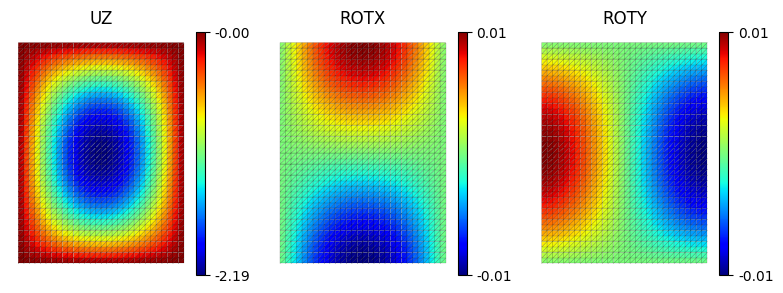

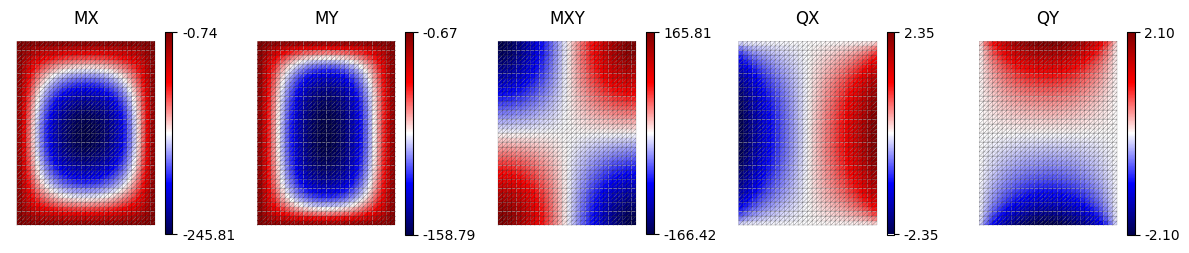

In [9]:
fig = plt.figure(figsize=(8, 3))  # in inches
fig.patch.set_facecolor('white')
cmap = 'jet'
gs = gridspec.GridSpec(1, 3)
for i, key in enumerate([UZ, ROTX, ROTY]):
    ax = fig.add_subplot(gs[i])
    triplot(triobj, ax=ax, fig=fig, title=labels[key],
            data=res2d[key, :], cmap=cmap, axis='off')
fig.tight_layout()

fig = plt.figure(figsize=(12, 3))  # in inches
fig.patch.set_facecolor('white')
cmap = 'seismic'
gs = gridspec.GridSpec(1, 5)
for i, key in enumerate([MX, MY, MXY, QX, QY]):
    ax = fig.add_subplot(gs[i])
    triplot(triobj, ax=ax, fig=fig, title=labels[key],
            data=res2d[key, :], cmap=cmap, axis='off')
fig.tight_layout()